<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [313]:
import pandas as pd
import psycopg2

In [314]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [315]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [316]:
query_3_1 = f'''
    SELECT COUNT(*)
    FROM public.vacancies
'''


In [317]:
pd.read_sql_query(query_3_1, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1467523473.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [318]:
query_3_2 = f''' 
    SELECT COUNT(*)
    FROM public.employers
'''


In [319]:
pd.read_sql_query(query_3_2, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1321910889.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [320]:
query_3_3 = f''' 
    SELECT COUNT(*)
    FROM public.areas
'''


In [321]:
pd.read_sql_query(query_3_3, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\169222152.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [322]:
query_3_4 = f''' 
    SELECT COUNT(*)
    FROM public.industries
'''

In [323]:
pd.read_sql_query(query_3_4, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2934468070.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_4, connection)


,count
0,294


***

* *Данные охватывают широкое количество регионов и свер деятельности.*
* *Количество работодателей вдвое меньше количества вакансий.*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [324]:
query_4_1 = f''' 
    SELECT a.name, COUNT(*)
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    GROUP BY a.name 
    ORDER BY 2 DESC
'''


In [325]:
pd.read_sql_query(query_4_1, connection).head()

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1673304228.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_1, connection).head()


,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [326]:
query_4_2 = f''' 
    SELECT COUNT(*)
    FROM public.vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL 
'''


In [327]:
pd.read_sql_query(query_4_2, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\495373726.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [328]:
query_4_3 = f''' 
    SELECT SUM(salary_from)/COUNT(salary_from)
    FROM public.vacancies
    WHERE salary_from IS NOT NULL
    UNION
    SELECT SUM(salary_to)/COUNT(salary_to)
    FROM public.vacancies
    WHERE salary_to IS NOT NULL
'''


In [329]:
pd.read_sql_query(query_4_3, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2240822411.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_3, connection)


,?column?
0,71064
1,110536


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [330]:
query_4_4 = f''' 
    SELECT schedule, employment, COUNT(*) count
    FROM public.vacancies
    GROUP BY schedule, employment
    ORDER BY count DESC
'''


In [331]:
pd.read_sql_query(query_4_4, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3130347181.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [332]:
query_4_5 = f''' 
    SELECT experience
    FROM public.vacancies
    GROUP BY experience
    ORDER BY COUNT(*)
'''


In [333]:
pd.read_sql_query(query_4_5, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3496489661.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_5, connection)


,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2501690761.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_1, connection).head(10).plot(kind='bar', x='name', title='Количество вакансий по регионам');
C:\Users\User\AppData\Local\Temp\ipykernel_15008\2501690761.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_4, connection).plot(kind='bar', x='schedule', title='Популярность типов занятости (график работы + тип трудоустройство)');


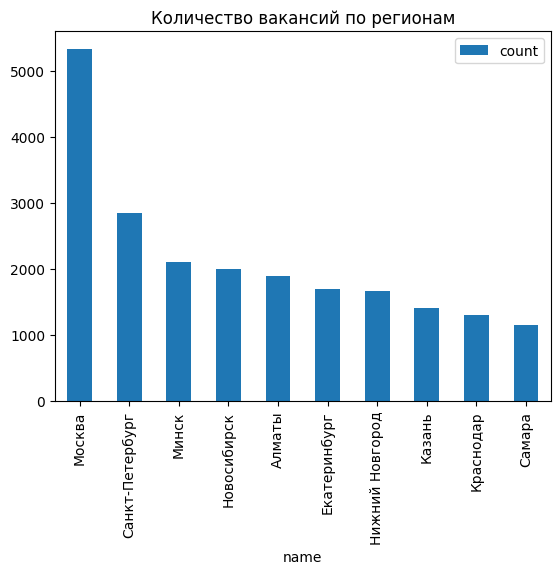

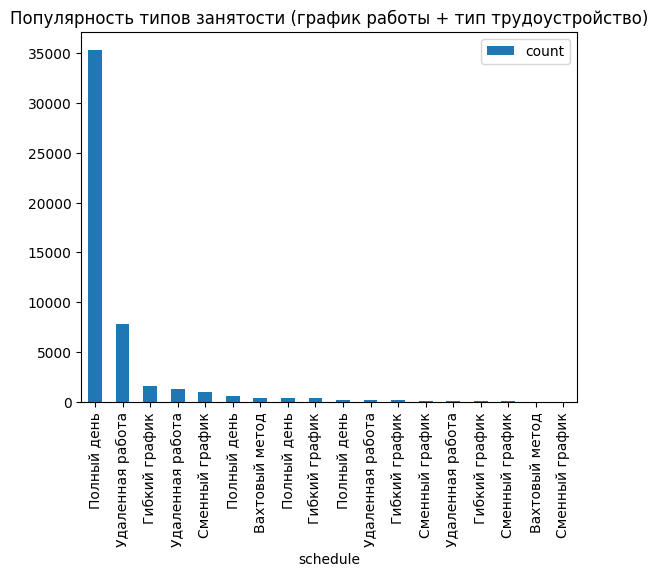

In [334]:
pd.read_sql_query(query_4_1, connection).head(10).plot(kind='bar', x='name', title='Количество вакансий по регионам');
pd.read_sql_query(query_4_4, connection).plot(kind='bar', x='schedule', title='Популярность типов занятости (график работы + тип трудоустройство)');

* *Количество вакансий в Москве значительно выше чем в других городах.*
* *Диапазон заработной платы в среднем варируется в пределах между 71 тыс. и 110 тыс. рулей*
* *Самая популярная комбинация типов занятости - это полный рабочий день вместе с полной занятостью. Она заметно превосходит другие комбинации и ее популярность более чем в 4 раза выше, чем у второго наиболее популярного варианта.*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [335]:
query_5_1 = f''' 
    SELECT e.name, COUNT(*)
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    GROUP BY e.id
    ORDER BY COUNT(*) DESC
'''


In [336]:
pd.read_sql_query(query_5_1, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2735860424.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14901,Евсеев Сергей Владимирович,1
14902,Кадровые технологии,1
14903,ЛОМБАРД 24,1
14904,Авто-Компонент ТД,1


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [337]:
query_5_2 = f''' 
    SELECT a.name areas, COUNT(DISTINCT e.name) employers, COUNT(v.name) vacancies
    FROM public.areas a
    LEFT JOIN public.employers e ON a.id = e.area OR e.area = a.id
    LEFT JOIN public.vacancies v ON a.id = v.area_id OR v.area_id = a.id
    WHERE v.name IS NULL
    GROUP BY a.name
    ORDER BY 2 DESC
'''


In [338]:
pd.read_sql_query(query_5_2, connection).head()

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2948032325.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_2, connection).head()


,areas,employers,vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [339]:
query_5_3 = f''' 
    SELECT e.name employers, COUNT(DISTINCT a.name) areas
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    JOIN public.areas a ON v.area_id = a.id
    GROUP BY e.name
    ORDER BY COUNT(DISTINCT a.name) DESC
'''


In [340]:
pd.read_sql_query(query_5_3, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3071232566.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_3, connection)


,employers,areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [341]:
query_5_4 = f''' 
    SELECT COUNT(e.name)
    FROM public.employers e
    LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id OR ei.employer_id = e.id
    WHERE ei.industry_id IS NULL
'''


In [342]:
pd.read_sql_query(query_5_4, connection).head()

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1206186997.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_4, connection).head()


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [343]:
query_5_5 = f''' 
    SELECT e.name, COUNT(*)
    FROM public.employers e
    LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id OR ei.employer_id = e.id
    GROUP BY e.name
    HAVING COUNT(*) = 4
    ORDER BY 1 ASC
'''


In [344]:
pd.read_sql_query(query_5_5, connection).head()

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2427118398.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_5, connection).head()


,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [345]:
query_5_6 = f''' 
    SELECT COUNT(e.name)
    FROM public.employers e
    LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id OR ei.employer_id = e.id
    JOIN public.industries i ON ei.industry_id = i.id
    WHERE i.name = 'Разработка программного обеспечения'
'''


In [346]:
pd.read_sql_query(query_5_6, connection).head()

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1163460366.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_6, connection).head()


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [347]:
query_5_7 = f''' 
    SELECT a.name, COUNT(*)
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    JOIN public.areas a ON v.area_id = a.id
    WHERE e.name = 'Яндекс' AND a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
    GROUP BY a.name
    UNION
    SELECT 'Total', COUNT(*)
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    JOIN public.areas a ON v.area_id = a.id
    WHERE e.name = 'Яндекс' AND a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
'''


In [348]:
pd.read_sql_query(query_5_7, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2888435755.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_7, connection)


,name,count
0,Total,485
1,Волгоград,24
2,Воронеж,32
3,Екатеринбург,39
4,Казань,25
5,Краснодар,30
6,Красноярск,23
7,Москва,54
8,Нижний Новгород,36
9,Новосибирск,35


***

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3051562248.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection).sort_values(by='count', ascending=False)


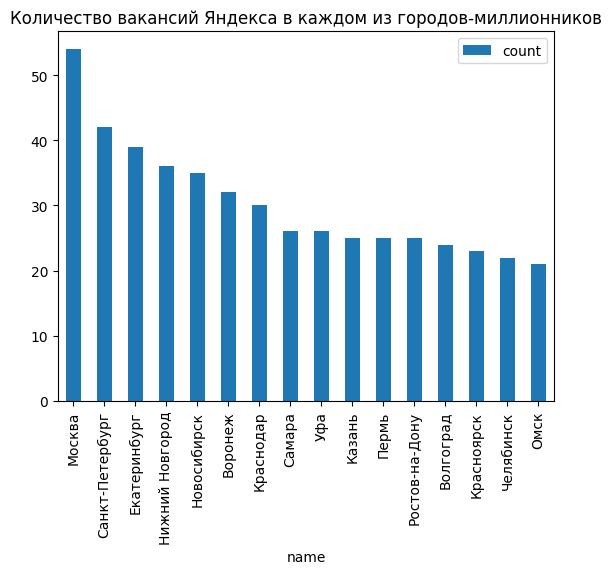

In [349]:
df = pd.read_sql_query(query_5_7, connection).sort_values(by='count', ascending=False)
df = df.drop(index=0, axis=0)
df.plot(kind='bar', x='name', title='Количество вакансий Яндекса в каждом из городов-миллионников');

* *Со значительным отрывом, лидирующую позицию среди работодателей по количеству вакансий, занимает компания Яндекс.*
* *Среди вакансий Яндекса, наибольшее их количество приходится на Москву, затем идёт Санкт-Петербург и с небольшим отрывом остальные города-миллионники.*
* *У большинства работодателей не указана сфера их деятельности.*
* *Вакансии поступают от самых разнообразных по своему масштабу компаний. От местных (с одним указанным регионом), до больших компаний (до 181 региона).*

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [350]:
query_6_1 = f''' 
    SELECT COUNT(*)
    FROM public.vacancies
    WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
'''

In [351]:
pd.read_sql_query(query_6_1, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2814080296.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [352]:
query_6_2 = f''' 
    SELECT name
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%' /*параметры для фильтрации: Data Sceintist*/
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND (LOWER(name) LIKE '%junior%' /*параметры для фильтрации: Junior*/
        OR experience = 'Нет опыта'
        OR employment = 'Стажировка')
'''

In [353]:
pd.read_sql_query(query_6_2, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3416457153.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_2, connection)


,name
0,Junior+ CV/ML developer
1,Data Scientist (Junior+)
2,Junior Data Scientist (Стажер)
3,"Математик, Junior/Middle/Senior Data Scientist"
4,Junior Data Scientist
5,Data Scientist/Machine Learning Engineer (Deve...
6,Data Scientist (Junior)
7,Intern/Junior Data Scientist
8,Junior Data Scientist (VK)
9,Junior/Middle Data Scientist


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [354]:
query_6_3 = f''' 
    SELECT COUNT(*)
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND (key_skills LIKE '%SQL%'
        OR key_skills LIKE '%postgres%')
'''


In [355]:
pd.read_sql_query(query_6_3, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\133616535.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [356]:
query_6_4 = f''' 
    SELECT cOUNT(key_skills)
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND key_skills LIKE '%Python%'
'''


In [357]:
pd.read_sql_query(query_6_4, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\2825363179.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [358]:
query_6_5 = f''' 
    SELECT AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, '\t', '')) + 1)
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%' /*профессия Data Sceintist*/
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND key_skills IS NOT NULL
'''


In [359]:
pd.read_sql_query(query_6_5, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1879125076.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_5, connection)


,avg
0,6.406032


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [360]:
query_6_6 = f''' 
    WITH t AS (
        SELECT experience, salary_from avg /*оставляются вакансии только с нижней границей оплаты труда*/
        FROM public.vacancies
        WHERE (LOWER(name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND salary_to IS NULL AND salary_from IS NOT NULL
        UNION ALL
        SELECT experience, salary_to /*оставляются вакансии только с верхней границей оплаты труда*/
        FROM public.vacancies
        WHERE (LOWER(name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND salary_from IS NULL AND salary_to IS NOT NULL
        UNION ALL
        SELECT experience, (salary_to + salary_from)/2 /*оставляются вакансии, входящие в обе границы оплаты труда*/
        FROM public.vacancies
        WHERE (LOWER(name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND salary_from IS NOT NULL AND salary_to IS NOT NULL
        )
    SELECT experience, AVG(avg)
    FROM t
    GROUP BY experience
'''

In [361]:
pd.read_sql_query(query_6_6, connection)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\791858229.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_6, connection)


,experience,avg
0,От 3 до 6 лет,243114.666667
1,От 1 года до 3 лет,139674.750000
2,Нет опыта,74642.857143


***

C:\Users\User\AppData\Local\Temp\ipykernel_15008\32154571.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection).iloc[0]
C:\Users\User\AppData\Local\Temp\ipykernel_15008\32154571.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.loc['junior_count'] = pd.read_sql_query(query_6_2, connection).count().iloc[0]
C:\Users\User\AppData\Local\Temp\ipykernel_15008\32154571.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.iloc[0] = df.iloc[0] - pd.read_sql_query(query_6_2, connectio

count           429
junior_count     51
Name: 0, dtype: int64

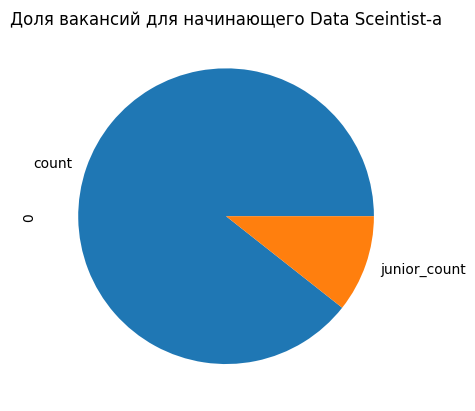

In [362]:
query = f''' 
    SELECT COUNT(id)
    FROM public.vacancies
    WHERE LOWER(name) LIKE '%data scientist%' /*параметры для фильтрации: Data Sceintist*/
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%'
'''
df = pd.read_sql_query(query, connection).iloc[0]
df.loc['junior_count'] = pd.read_sql_query(query_6_2, connection).count().iloc[0]
df.iloc[0] = df.iloc[0] - pd.read_sql_query(query_6_2, connection).count().iloc[0]
df.plot(kind='pie', title = 'Доля вакансий для начинающего Data Sceintist-а')
display(df)

* *Немногим меньше половины всех вакансий для профессии Data Sceinse, требуют от специалиста знание SQL, а для более чем половины, необходим навык владения Python.*
* *Начинающие специалисты в Data Sceinse занимают незначительную долю вакансий этой профессии.*
* *Специалисты Data Sceinse с опытом работы от 3 до 6 лет имеют почти в 2 раза большую зарплату, чем специалисты с опытом от 1 до 3 лет.*


# Общий вывод по проекту

In [363]:
query = f'''
    SELECT 'min_avg' AS name, AVG(salary_from) mean
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%' /*параметры для фильтрации: Data Sceintist*/
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND (LOWER(name) LIKE '%junior%' /*параметры для фильтрации: Junior*/
        OR experience = 'Нет опыта'
        OR employment = 'Стажировка')
    UNION 
    SELECT 'max_avg', AVG(salary_to) 
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%' /*параметры для фильтрации: Data Sceintist*/
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND (LOWER(name) LIKE '%junior%' /*параметры для фильтрации: Junior*/
        OR experience = 'Нет опыта'
        OR employment = 'Стажировка')
'''
df_1 = pd.read_sql_query(query, connection)
query = f''' 
    SELECT e.name, AVG(salary_from)
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    WHERE salary_from IS NOT NULL
    GROUP BY e.name
    ORDER BY COUNT(v.id) DESC

'''
df_2 = pd.read_sql_query(query, connection)
query = f''' 
    WITH t AS (
        SELECT e.name, v.experience, v.salary_from avg /*оставляются вакансии только с нижней границей оплаты труда*/
        FROM public.vacancies v
        JOIN public.employers e ON v.employer_id = e.id
        WHERE (LOWER(v.name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(v.name) LIKE '%data science%'
            OR LOWER(v.name) LIKE '%исследователь данных%'
            OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
            OR LOWER(v.name) LIKE '%machine learning%'
            OR LOWER(v.name) LIKE '%машинн%обучен%')
            AND salary_to IS NULL AND salary_from IS NOT NULL
        UNION ALL
        SELECT e.name, v.experience, v.salary_to /*оставляются вакансии только с верхней границей оплаты труда*/
        FROM public.vacancies v
        JOIN public.employers e ON v.employer_id = e.id
        WHERE (LOWER(v.name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(v.name) LIKE '%data science%'
            OR LOWER(v.name) LIKE '%исследователь данных%'
            OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
            OR LOWER(v.name) LIKE '%machine learning%'
            OR LOWER(v.name) LIKE '%машинн%обучен%')
            AND salary_from IS NULL AND salary_to IS NOT NULL
        UNION ALL
        SELECT e.name, v.experience, (v.salary_to + v.salary_from)/2 /*оставляются вакансии, входящие в обе границы оплаты труда*/
        FROM public.vacancies v
        JOIN public.employers e ON v.employer_id = e.id
        WHERE (LOWER(v.name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(v.name) LIKE '%data science%'
            OR LOWER(v.name) LIKE '%исследователь данных%'
            OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
            OR LOWER(v.name) LIKE '%machine learning%'
            OR LOWER(v.name) LIKE '%машинн%обучен%')
            AND salary_from IS NOT NULL AND salary_to IS NOT NULL
        )
    SELECT name, AVG(avg)
    FROM t
    GROUP BY name
    ORDER BY 2 DESC
'''
df_3 = pd.read_sql_query(query, connection) 
query = f''' 
        SELECT AVG(v.salary_from) avg /*оставляются вакансии только с нижней границей оплаты труда*/
        FROM public.vacancies v
        JOIN public.employers e ON v.employer_id = e.id
        WHERE (LOWER(v.name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(v.name) LIKE '%data science%'
            OR LOWER(v.name) LIKE '%исследователь данных%'
            OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
            OR LOWER(v.name) LIKE '%machine learning%'
            OR LOWER(v.name) LIKE '%машинн%обучен%')
            AND salary_from IS NOT NULL
        UNION ALL
        SELECT AVG(v.salary_to) /*оставляются вакансии только с верхней границей оплаты труда*/
        FROM public.vacancies v
        JOIN public.employers e ON v.employer_id = e.id
        WHERE (LOWER(v.name) LIKE '%data scientist%' /*профессия Data Sceintist*/
            OR LOWER(v.name) LIKE '%data science%'
            OR LOWER(v.name) LIKE '%исследователь данных%'
            OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
            OR LOWER(v.name) LIKE '%machine learning%'
            OR LOWER(v.name) LIKE '%машинн%обучен%')
            AND salary_to IS NOT NULL
'''
df_3_1 = pd.read_sql_query(query, connection) 
# Количество сфер деятельности всех вакансий, которым требуются специалисты в Data Sceince
query = f'''
    SELECT COUNT(DISTINCT i.id)
    FROM public.vacancies v
    JOIN public.employers_industries e ON v.employer_id = e.employer_id
    JOIN public.industries i ON e.industry_id = i.id
    WHERE LOWER(v.name) LIKE '%data scientist%' /*профессия Data Sceintist*/
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%'
'''
df_4 = pd.read_sql_query(query, connection)
query = f''' 
    SELECT schedule || '-' || employment AS name, AVG(salary_from) avg
    FROM public.vacancies
    GROUP BY schedule, employment
    ORDER BY 2 DESC
'''
df_5 = pd.read_sql_query(query, connection)
display(df_1)
display(df_3.head())
display(df_3.mean())
display(df_3_1)
display(df_4)

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3807322166.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql_query(query, connection)
C:\Users\User\AppData\Local\Temp\ipykernel_15008\3807322166.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2 = pd.read_sql_query(query, connection)
C:\Users\User\AppData\Local\Temp\ipykernel_15008\3807322166.py:77: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3 = pd.read_sql_query(query, connection)
C:\Users\User\AppData\Local\Temp\ipykernel_15008\380732216

,name,mean
0,max_avg,92500.000000
1,min_avg,57857.142857


,name,avg
0,Итон,450000.0
1,AppQuantum,350000.0
2,Дром,300000.0
3,OVISION,300000.0
4,JSA Group,300000.0


C:\Users\User\AppData\Local\Temp\ipykernel_15008\3807322166.py:125: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_3.mean())


avg    175186.070513
dtype: float64

,avg
0,216355.772727
1,146804.521739


,count
0,97


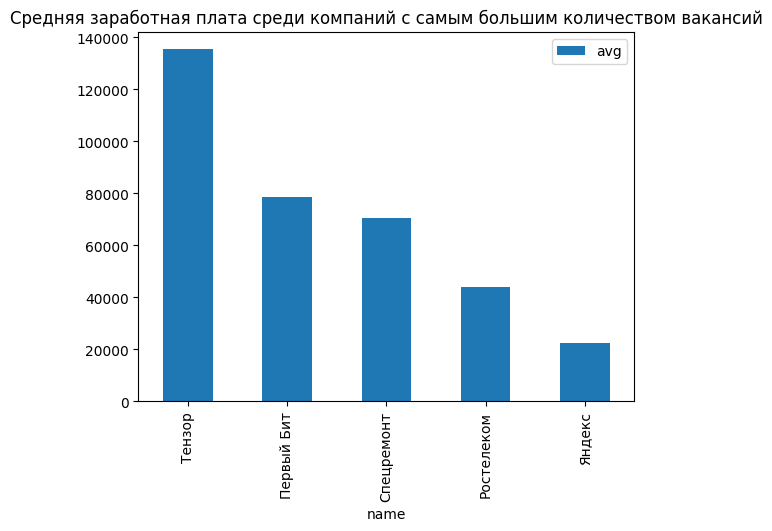

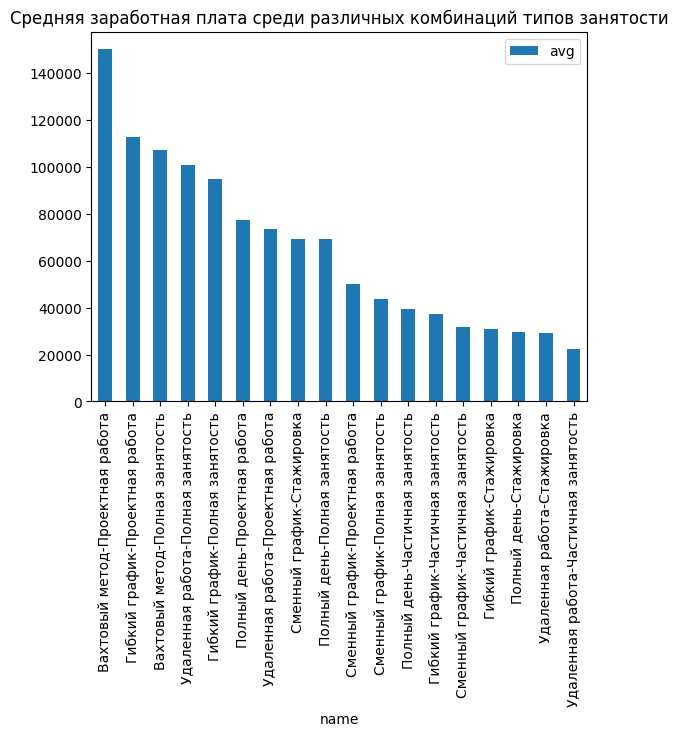

In [364]:
df_2.head(5).sort_values(by='avg', ascending=False).plot(kind='bar', 
                                                         x='name', 
                                                         title='Средняя заработная плата среди компаний с самым большим количеством вакансий')
df_5.plot(kind='bar', x='name', title='Средняя заработная плата среди различных комбинаций типов занятости');

* *Средняя зарплата начинающего Data Sceintist-а варируется от 58 тыс. до 92 тыс. рублей, а средняя зарплата по этой профессии в целом, составляет 175 тыс. рублей.*
* *Количество индустрий, где требуются Data Sceintist-ы, имеет значительные объёмы, не менее трети (97) индустрий, из всех имеющихся в данных.*
* *Среди пяти компаний с самым большим количеством вакансий, самую высокую зарплату предлагает к компания Танзор, в то время как наименьшую предоставляет Яндекс.*
* *Самая высокооплачиваемая комбинация типов занятости - это вахтовый метод + проектная работа. В то время как самая низкооплачиваемая - это удалённая работа + частичная занятость.*

* #### *Профессия Data Sceince имеет широкое применение в различных сферах деятельности. Зарплата для этой профессии также больше средней по рынку.*
* #### *Наиболее популярным регионом среди вакансий, является Москва. В то время как наиболее популярной компанией - Яндекс.*
* #### *Самым распространённым типом занятости, является полный рабочий день вместе с полной занятостью, а самым высокооплачиваемым - вахтовый метод с проектной работой.*
